In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_excel(r'C:\Users\TRAN AN QUAN\Resume-Screeningvn\Preprocessing_data.xlsx')
dataset

,No,Vị trí việc làm,Yêu cầu công việc
0,1,Nhân viên kinh doanh,"- Trung thực, nhanh nhẹn và có chí cầu tiến.- ..."
1,2,Nhân viên kinh doanh,"- Nam, tuổi từ 21 trở lên;- Yêu thích kinh doa..."
2,3,Nhân viên kinh doanh,- Ứng viên tốt nghiệp từ Trung cấp trở lên- Nh...
3,4,Nhân viên kinh doanh,Tốt nghiệp đại học trở lên chuyên ngành bao gồ...
4,5,Nhân viên kinh doanh,"- Không yêu cầu kinh nghiệm, sẽ được đào tạo t..."
...,...,...,...
5505,5506,"Bác sĩ, nhân viên Y dược",Tốt nghiệp hệ đại học chính quy chuyên ngành N...
5506,5507,"Bác sĩ, nhân viên Y dược",- Đủ từ 22 tuổi trở lên. Tốt nghiệp từ cao đẳn...
5507,5508,"Bác sĩ, nhân viên Y dược",•Tốt nghiệp cao đẳng trở lên •Độ tuổi: 22t - 3...
5508,5509,"Bác sĩ, nhân viên Y dược","+ Ứng viên tốt nghiệp chuyên ngành Kinh tế, Y ..."


In [4]:
dataset['Vị trí việc làm'].value_counts()

Nhân viên kinh doanh             1276
Nhân viên tư vấn                 1077
Kế toán                           701
Marketing                         398
Nhân viên IT                      391
Nhân viên kỹ thuật                360
Nhân viên thiết kế                278
Nhân viên lái xe - Vận tải        248
Nhân viên Tài chính-Bảo hiểm      242
Giáo viên                         241
Bác sĩ, nhân viên Y dược          171
Nhân viên du lịch- khách sạn      127
Name: Vị trí việc làm, dtype: int64

In [5]:
dataset.shape

(5510, 3)

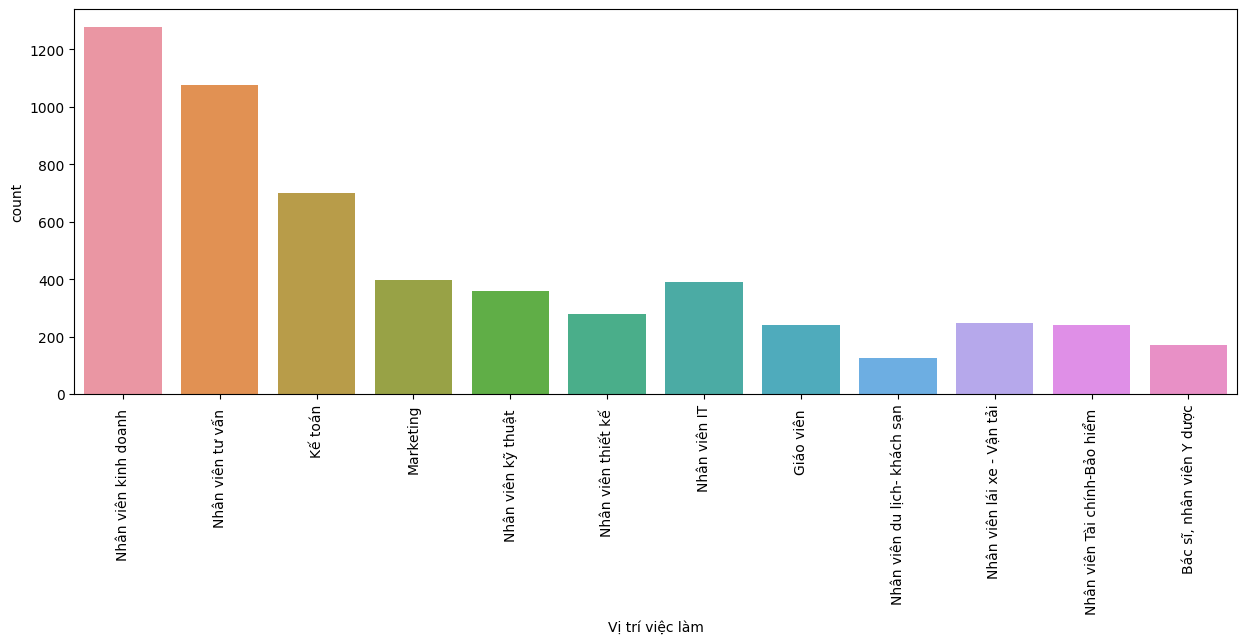

In [6]:
plt.figure(figsize=(15,5))
sns.countplot(dataset, x='Vị trí việc làm')
plt.xticks(rotation=90)
plt.show()

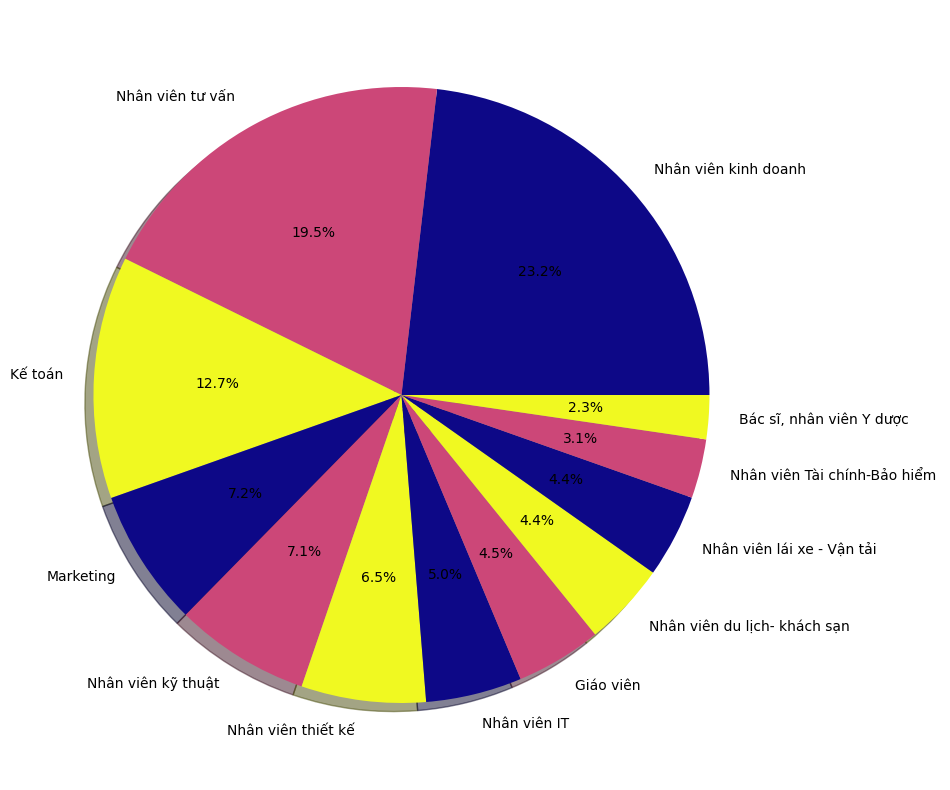

In [8]:
counts = dataset['Vị trí việc làm'].value_counts()
labels = dataset['Vị trí việc làm'].unique()
plt.figure(figsize=(15,10))

plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True, colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

In [9]:
from sklearn.utils import resample

# Define the maximum count among all categories
max_count = dataset['Vị trí việc làm'].value_counts().max()

# Resample each category to match the maximum count
balanced_data = []
for category in dataset['Vị trí việc làm'].unique():
    category_data = dataset[dataset['Vị trí việc làm'] == category]
    if len(category_data) < max_count:
        # Perform oversampling for categories with fewer samples
        balanced_category_data = resample(category_data, replace=True, n_samples=max_count, random_state=42)
    else:
        # Perform undersampling for categories with more samples
        balanced_category_data = resample(category_data, replace=False, n_samples=max_count, random_state=42)
    balanced_data.append(balanced_category_data)

# Concatenate the balanced data for all categories
balanced_df = pd.concat(balanced_data)

In [10]:
# balanced_df.isnull().sum()
balanced_df.dropna(inplace=True)

In [11]:
X = balanced_df['Yêu cầu công việc']
y = balanced_df['Vị trí việc làm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

Độ chính xác dự báo: 0.9340515834149526
                               precision    recall  f1-score   support

     Bác sĩ, nhân viên Y dược       0.95      1.00      0.97       247
                   Giáo viên        0.98      0.98      0.98       263
                      Kế toán       0.95      0.98      0.97       255
                    Marketing       0.98      0.95      0.96       265
                 Nhân viên IT       0.98      0.95      0.96       281
Nhân viên Tài chính-Bảo hiểm        0.86      0.99      0.92       242
 Nhân viên du lịch- khách sạn       0.96      1.00      0.98       263
        Nhân viên kinh doanh        0.79      0.80      0.79       257
          Nhân viên kỹ thuật        0.99      0.93      0.96       252
   Nhân viên lái xe - Vận tải       0.99      1.00      1.00       244
          Nhân viên thiết kế        0.94      0.98      0.96       240
            Nhân viên tư vấn        0.84      0.65      0.73       254

                     accuracy      

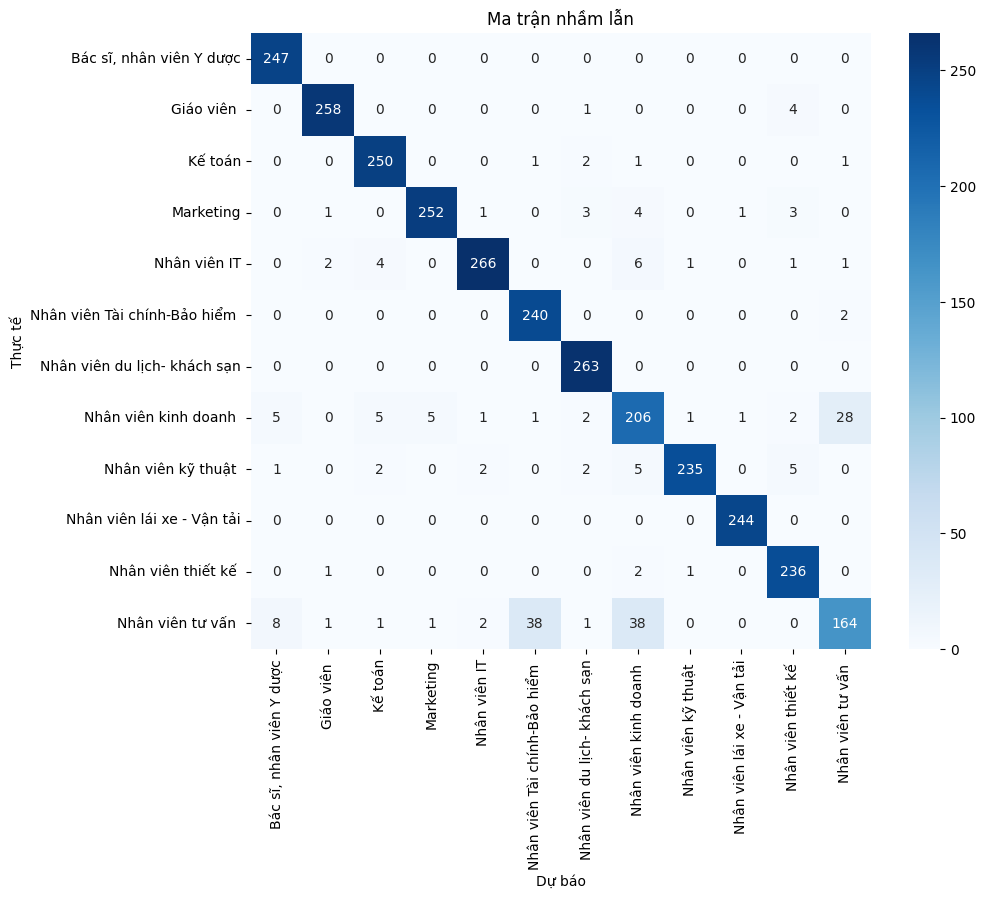

In [13]:
from sklearn.metrics import classification_report

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf, y_train)

# Step 4: Accuracy Evaluation
y_pred = rf_classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác dự báo:", accuracy)
print(classification_report(y_test,y_pred))
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Dự báo')
plt.ylabel('Thực tế')
plt.title('Ma trận nhầm lẫn')
plt.show()

In [14]:
# Clean resume
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    return cleanText


# Prediction and Category Name
def predict_category(resume_text):
    resume_text= cleanResume(resume_text)
    resume_tfidf = tfidf_vectorizer.transform([resume_text])
    predicted_category = rf_classifier.predict(resume_tfidf)[0]
    return predicted_category

In [15]:
# Example Usage
resume_file = """ Trung thực, nhanh nhẹn và có chí cầu tiến.- Thành thạo tin học văn phòng cơ bản.- Có đam mê kinh doanh.- Chưa có kinh nghiệm sẽ được đào tạo.- Yêu cầu : Nam/nữ dưới 25-55 tuổi sức khỏe tốt- Tốt nghiệp : Cao Đẳng/Đại Học khối kinh tế, Quản Trị Kinh Doanh, Thương Mại, Bưu Chính Viễn Thông....- Khả năng chịu được áp lực công việc, thời gian làm việc kéo dài- Nhanh nhẹn, hoạt bát, chịu đựơc áp lực, hoạt đông độc lập.
"""
predicted_category = predict_category(resume_file)
print("Nghề nghiệp tư vấn:", predicted_category)

Nghề nghiệp tư vấn: Nhân viên kinh doanh 


In [16]:
# Example Usage
resume_file = """ Trình độ học vấn: Đại học2. Chuyên môn: chuyên ngành kế toán/ kế toán doanh nghiệp và các ngành liên quan3. Kinh ngiệm: tối thiểu 1 năm tại vị trí tương đương
"""

predicted_category = predict_category(resume_file)
print("Nghề nghiệp tư vấn:", predicted_category)

Nghề nghiệp tư vấn: Kế toán


In [17]:
# Example Usage
resume_file = """ Có kiến thức nền tảng về Content Marketing, đam mê và khả năng viết sáng tạo• Kỹ năng viết bài và tư duy ngôn ngữ tốt• Có kinh nghiệm 6 tháng trở lên tại vị trí tương đương• Khả năng làm việc độc lập cao, có trách nhiệm• Ham học hỏi, nhiệt tình, chủ động trong công việc
"""

predicted_category = predict_category(resume_file)
print("Nghề nghiệp tư vấn:", predicted_category)

Nghề nghiệp tư vấn: Marketing


In [18]:
import pickle
pickle.dump(rf_classifier,open('rf_classifier_categorization.pkl','wb'))
pickle.dump(tfidf_vectorizer,open('tfidf_vectorizer_categorization.pkl','wb'))